In [16]:
from __future__ import division, print_function, unicode_literals

import numpy as np 
import os 
import sys 

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 


In [17]:
def plot_iamge(iamge, shape=[28,28]):
    plt.imshow(image.reshape(shape), cmap="Greys",interpolation="nearest")
    plt.axis("off")

In [18]:
def plot_multiple_images(images, n_rows, n_cols, pad=2):
    images = images - images.min() 
    w, h = images.shape[1:]
    image = np.zeros(((w+pad)*n_rows+pad,(h+pad)*n_cols+pad))
    for y in range(n_cols):
        for x in range(n_cols):
            image[(y*(h+pad)+pad):(y*(h+pad)+pad+h),(w*(w+pad)+pad):(x*(w+pad)+pad+w)]= images[y*n_cols+x]
    plt.imshow(image, cmap="Greys",interpolation="nearest")
    plt.axis("off")

In [19]:
import numpy.random as rnd

rnd.seed(4)
m = 200 
w1, w2, = 0.1, 0.3
noise = 0.1

angles = rnd.rand(m) * 3 * np.pi / 2 - 0.5
data = np.empty((m, 3))
data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * rnd.randn(m)/2
data[:, 1] = np.sin(angles) + 0.7 + noise * rnd.randn(m) / 2
data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * rnd.randn(m)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(data[:100])
X_test = scaler.transform(data[100:])

In [22]:
import tensorflow as tf
reset_graph()

n_inputs = 3 
n_hidden = 2 
n_outputs = n_inputs

learning_rate = 0.01
X = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden = tf.layers.dense(X, n_hidden)
outputs = tf.layers.dense(hidden, n_outputs)

reconstruction_loss = tf.reduce_mean(tf.square(outputs - X))

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(reconstruction_loss)

init = tf.global_variables_initializer()

In [23]:
n_iterations = 1000
codings = hidden 

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        training_op.run(feed_dict={X:X_train})
    codings_val = codings.eval(feed_dict={X: X_test})

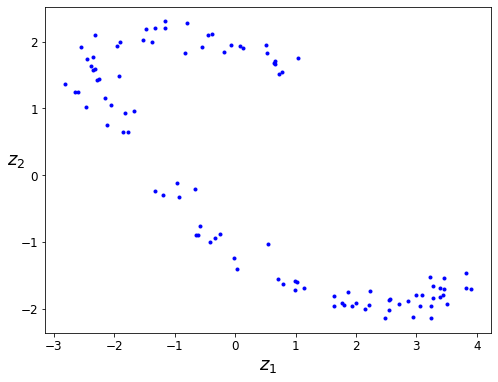

In [27]:
fig = plt.figure(figsize=(8,6))
plt.plot(codings_val[:, 0], codings_val[:, 1],"b.")
plt.xlabel("$z_1$",fontsize=18)
plt.ylabel("$z_2$",fontsize=18, rotation=0)
plt.show()